<a href="https://colab.research.google.com/github/Nightmare125/Machine-Learning/blob/main/Generalization_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 1: Data Preparation

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


Load the dataset using Pandas

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving kc_house_data.csv to kc_house_data (1).csv


In [ ]:
df = pd.read_csv("kc_house_data.csv")

Drop non-numeric or irrelevant features

In [ ]:
df = df.drop(columns=["id", "date"])

Select a subset of features and the target

In [ ]:
selected_features = ["sqft_living", "bedrooms", "bathrooms", "floors", "view"]
target = "price"

Filter the dataframe

In [ ]:
df = df[selected_features + [target]]

Handle missing values

In [ ]:
df = df.dropna()

Convert to NumPy arrays

In [ ]:
data = df.to_numpy()

Normalize features (mean = 0, std = 1)

In [ ]:
X = data[:, :-1]
y = data[:, -1].reshape(-1, 1)

X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std

Add bias term

In [ ]:
X_norm = np.hstack([np.ones((X_norm.shape[0], 1)), X_norm])

Train-test split (80% train, 20% test)

In [ ]:
np.random.seed(42)  # for reproducibility
indices = np.random.permutation(X_norm.shape[0])
train_size = int(0.8 * X_norm.shape[0])

train_idx, test_idx = indices[:train_size], indices[train_size:]
X_train, X_test = X_norm[train_idx], X_norm[test_idx]
y_train, y_test = y[train_idx], y[test_idx]

Print shapes to verify

In [ ]:
print("X_train:", X_train.shape)
print("y_train:", y_train.shape)
print("X_test:", X_test.shape)
print("y_test:", y_test.shape)

X_train: (17290, 6)
y_train: (17290, 1)
X_test: (4323, 6)
y_test: (4323, 1)


# Part 2: Basic Linear Regression with Gradient Descent

Mean Squared Error Cost Function

In [ ]:
def compute_cost(X, y, theta):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    cost = (1 / (2 * m)) * np.sum(error ** 2)
    return cost

Gradient Descent for Linear Regression

In [ ]:
def gradient_descent(X, y, theta, learning_rate, num_iters):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = predictions - y
        gradients = (1 / m) * X.T.dot(error)
        theta -= learning_rate * gradients
        cost = compute_cost(X, y, theta)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history

Initialize theta (weights)

In [ ]:
theta = np.zeros((X_train.shape[1], 1))

Set hyperparameters

In [ ]:
learning_rate = 0.01
num_iters = 1000

Train model

In [ ]:
theta_trained, cost_history = gradient_descent(X_train, y_train, theta, learning_rate, num_iters)

Iteration 0: Cost = 211464592938.2090
Iteration 100: Cost = 54940168621.2253
Iteration 200: Cost = 36204889475.6367
Iteration 300: Cost = 33103420761.2719
Iteration 400: Cost = 32336928826.1205
Iteration 500: Cost = 32028081089.2125
Iteration 600: Cost = 31862903339.2646
Iteration 700: Cost = 31765039210.3056
Iteration 800: Cost = 31704940655.6547
Iteration 900: Cost = 31667435934.2810


Plot cost over iterations

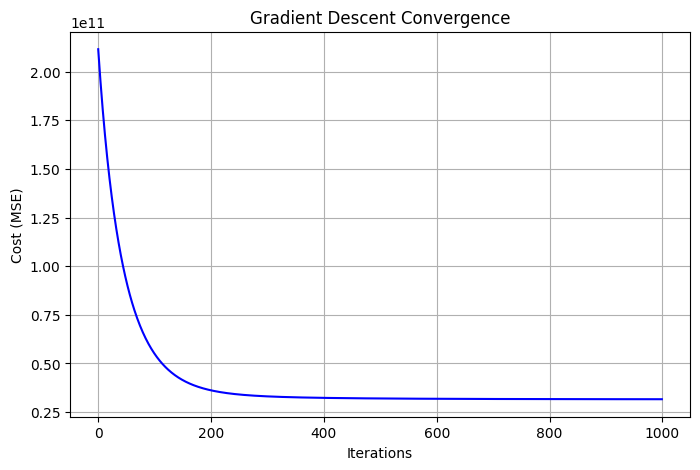

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_history, color='blue')
plt.xlabel('Iterations')
plt.ylabel('Cost (MSE)')
plt.title('Gradient Descent Convergence')
plt.grid(True)
plt.show()

Evaluate on test set

In [ ]:
def evaluate_model(X, y, theta):
    predictions = X.dot(theta)
    mse = np.mean((predictions - y) ** 2)
    return mse

test_mse = evaluate_model(X_test, y_test, theta_trained)
print(f"Test MSE: {test_mse:.2f}")

Test MSE: 53649233428.02


# Part 3: Ridge Regression (L2 Regularization)

Ridge Cost Function (L2 Regularization)

In [ ]:
def compute_cost_ridge(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    regularization = (lambda_ / (2 * m)) * np.sum(theta[1:] ** 2)
    cost = (1 / (2 * m)) * np.sum(error ** 2) + regularization
    return cost


Gradient Descent with Ridge Regularization

In [ ]:
def gradient_descent_ridge(X, y, theta, learning_rate, num_iters, lambda_):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = predictions - y

        # Regularized gradient
        gradients = (1 / m) * (X.T.dot(error))
        gradients[1:] += (lambda_ / m) * theta[1:]

        theta -= learning_rate * gradients
        cost = compute_cost_ridge(X, y, theta, lambda_)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Ridge Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history

Initialize theta

In [ ]:
theta_ridge = np.zeros((X_train.shape[1], 1))

Hyperparameters

In [ ]:
learning_rate = 0.01
num_iters = 1000
lambda_ridge = 10

Train Ridge model

In [ ]:
theta_ridge_trained, cost_ridge_history = gradient_descent_ridge(
    X_train, y_train, theta_ridge, learning_rate, num_iters, lambda_ridge
)

Ridge Iteration 0: Cost = 211464597343.8394
Ridge Iteration 100: Cost = 54949223153.2927
Ridge Iteration 200: Cost = 36217490869.9281
Ridge Iteration 300: Cost = 33118552244.5726
Ridge Iteration 400: Cost = 32353957982.7828
Ridge Iteration 500: Cost = 32046510818.5020
Ridge Iteration 600: Cost = 31882350245.5590
Ridge Iteration 700: Cost = 31785216543.8064
Ridge Iteration 800: Cost = 31725638291.1613
Ridge Iteration 900: Cost = 31688501809.8338


Plot Ridge cost convergence

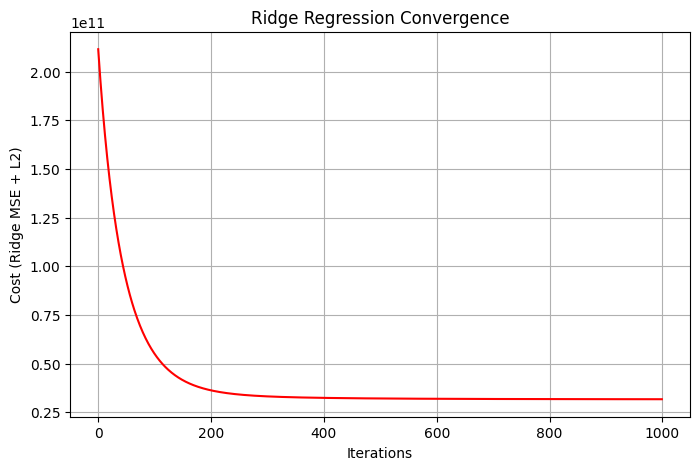

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_ridge_history, color='red')
plt.xlabel('Iterations')
plt.ylabel('Cost (Ridge MSE + L2)')
plt.title('Ridge Regression Convergence')
plt.grid(True)
plt.show()

Evaluate Ridge model on test set

In [ ]:
ridge_test_mse = evaluate_model(X_test, y_test, theta_ridge_trained)
print(f"Ridge Test MSE (lambda={lambda_ridge}): {ridge_test_mse:.2f}")

Ridge Test MSE (lambda=10): 53645215098.73


# Part 4: LASSO Regression (L1 Regularization)

LASSO Cost Function (L1 Regularization)

In [ ]:
def compute_cost_lasso(X, y, theta, lambda_):
    m = len(y)
    predictions = X.dot(theta)
    error = predictions - y
    regularization = (lambda_ / m) * np.sum(np.abs(theta[1:]))
    cost = (1 / (2 * m)) * np.sum(error ** 2) + regularization
    return cost

Gradient Descent with LASSO (L1 Regularization)

In [ ]:
def gradient_descent_lasso(X, y, theta, learning_rate, num_iters, lambda_):
    m = len(y)
    cost_history = []

    for i in range(num_iters):
        predictions = X.dot(theta)
        error = predictions - y

        gradients = (1 / m) * X.T.dot(error)

       # Add L1 penalty (subgradient): do not regularize theta[0]

        gradients[1:] += (lambda_ / m) * np.sign(theta[1:])

        theta -= learning_rate * gradients
        cost = compute_cost_lasso(X, y, theta, lambda_)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"LASSO Iteration {i}: Cost = {cost:.4f}")

    return theta, cost_history

Initialize theta

In [ ]:
theta_lasso = np.zeros((X_train.shape[1], 1))

Hyperparameters

In [ ]:
learning_rate = 0.01
num_iters = 1000
lambda_lasso = 0.1

Train LASSO model

In [ ]:
theta_lasso_trained, cost_lasso_history = gradient_descent_lasso(
    X_train, y_train, theta_lasso, learning_rate, num_iters, lambda_lasso
)

LASSO Iteration 0: Cost = 211464592938.2563
LASSO Iteration 100: Cost = 54940168623.0673
LASSO Iteration 200: Cost = 36204889477.4432
LASSO Iteration 300: Cost = 33103420763.3114
LASSO Iteration 400: Cost = 32336928828.2704
LASSO Iteration 500: Cost = 32028081091.4131
LASSO Iteration 600: Cost = 31862903341.4899
LASSO Iteration 700: Cost = 31765039212.5435
LASSO Iteration 800: Cost = 31704940657.8993
LASSO Iteration 900: Cost = 31667435936.5293


Plot LASSO cost convergence

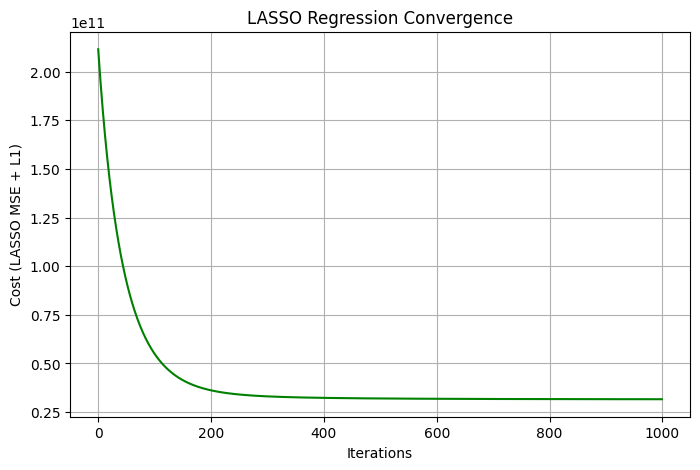

In [ ]:
plt.figure(figsize=(8, 5))
plt.plot(range(num_iters), cost_lasso_history, color='green')
plt.xlabel('Iterations')
plt.ylabel('Cost (LASSO MSE + L1)')
plt.title('LASSO Regression Convergence')
plt.grid(True)
plt.show()

Evaluate LASSO model on test set

In [ ]:
lasso_test_mse = evaluate_model(X_test, y_test, theta_lasso_trained)
print(f"LASSO Test MSE (lambda={lambda_lasso}): {lasso_test_mse:.2f}")

LASSO Test MSE (lambda=0.1): 53649233427.90


# Part 5: Analysis and Comparison

Collect all weights (excluding bias term at index 0)

In [ ]:
weights = {
    "Standard": theta_trained[1:].flatten(),
    "Ridge": theta_ridge_trained[1:].flatten(),
    "LASSO": theta_lasso_trained[1:].flatten()
}

feature_names = selected_features

x = np.arange(len(feature_names))  # for bar plotting

Plot bar chart of coefficients

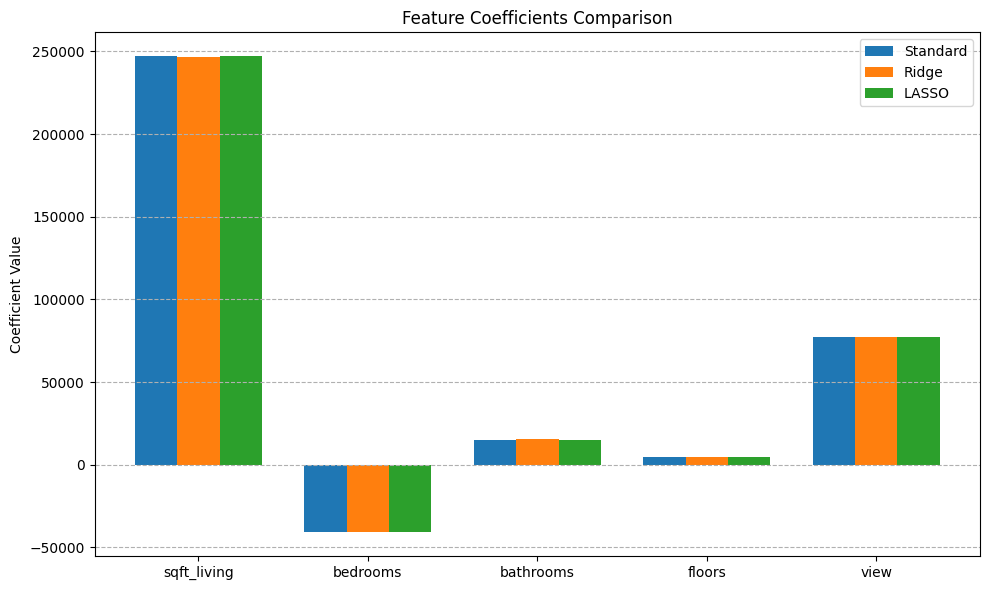

In [ ]:
plt.figure(figsize=(10, 6))
bar_width = 0.25

plt.bar(x - bar_width, weights["Standard"], width=bar_width, label="Standard")
plt.bar(x, weights["Ridge"], width=bar_width, label="Ridge")
plt.bar(x + bar_width, weights["LASSO"], width=bar_width, label="LASSO")

plt.xticks(x, feature_names)
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients Comparison")
plt.legend()
plt.grid(True, axis='y', linestyle='--')
plt.tight_layout()
plt.show()

Compare Test MSEs

In [ ]:
print("Model Performance on Test Set:")
print(f"Standard Linear Regression MSE: {test_mse:.2f}")
print(f"Ridge Regression MSE (λ={lambda_ridge}): {ridge_test_mse:.2f}")
print(f"LASSO Regression MSE (λ={lambda_lasso}): {lasso_test_mse:.2f}")

Model Performance on Test Set:
Standard Linear Regression MSE: 53649233428.02
Ridge Regression MSE (λ=10): 53645215098.73
LASSO Regression MSE (λ=0.1): 53649233427.90


MSE Bar Chart

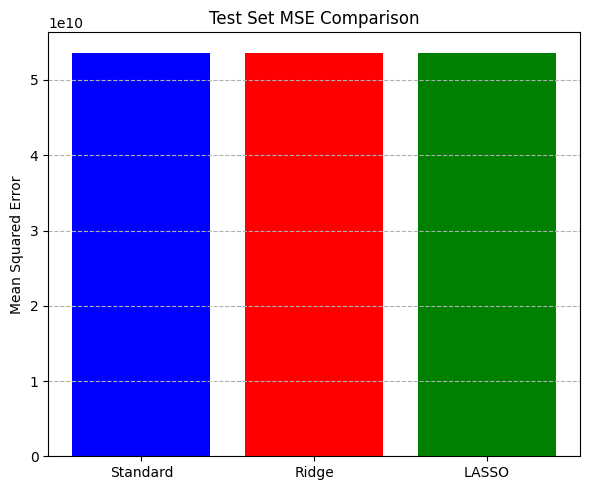

In [ ]:
models = ['Standard', 'Ridge', 'LASSO']
mses = [test_mse, ridge_test_mse, lasso_test_mse]

plt.figure(figsize=(6, 5))
plt.bar(models, mses, color=['blue', 'red', 'green'])
plt.ylabel("Mean Squared Error")
plt.title("Test Set MSE Comparison")
plt.grid(axis='y', linestyle='--')
plt.tight_layout()
plt.show()

## Summary
**Linear Regression**

Regularization Type - None

Purpose - Baseline model

Test MSE - 53649233428.02

**Ridge Regression**

Regularization Type - L2 (Lambda = 10)

Purpose - Shrinks all weights (no zeros)

Test MSE - 53645215098.73

**LASSO Regression**

Regularization Type - L1 (Lambda = 0.1)

Purpose - Shrinks and eliminates weights

Test MSE - 53649233427.90


## Trade off
Ridge is better when all features are informative.

LASSO is preferred when you suspect some features are irrelevant.

The regularization parameter (Lambda) needs tuning to avoid underfitting or over-penalization.